# Telcom Churn Prediction

Here’s a dataset of telecom customers, which you can also find on kaggle. There is data available on 7043 customers.

Which customers are likely to churn? What are the attributes that make you think so?

***The features:***
- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client’s Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

# Loading Dataset

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()
# TotalCharges Dtype wrong： object ---> float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#  7043 different customers
df["customerID"].value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

In [5]:
# df["gender"].unique()

In [6]:
# df.columns.to_list()

In [7]:
# check the elements & value_count of every columns
for i in df.columns.to_list():
    print(df[i].value_counts())
    print('-' * 60)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
------------------------------------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------------------------------------
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------------------------------------
PhoneServi

In [8]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1, "Yes").replace(0, "No")
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)
df["SeniorCitizen"].dtype

dtype('O')

In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["TotalCharges"].dtype

dtype('float64')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df = df.dropna(axis=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df = df.drop(columns=['customerID'])

## Visualization

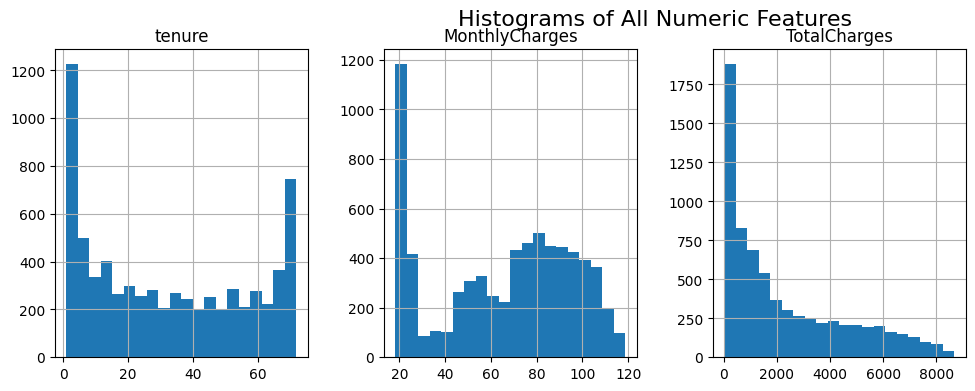

In [13]:
## histograms
df.hist(figsize=(16, 4), layout=(1, 4), bins=20)
plt.suptitle('Histograms of All Numeric Features', fontsize=16)
plt.show()

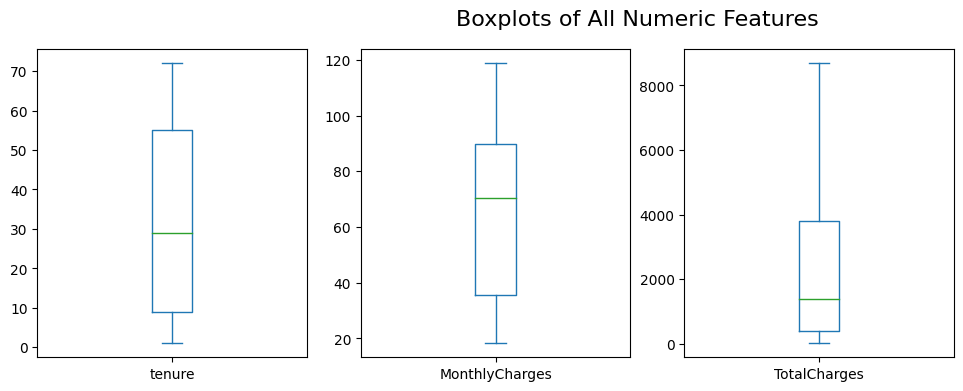

In [14]:
# Boxplots
df.plot(kind='box', subplots=True,figsize=(16, 4), layout=(1, 4))
plt.suptitle('Boxplots of All Numeric Features', fontsize=16)
plt.show()

In [15]:
df["SeniorCitizen"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7032, dtype: object

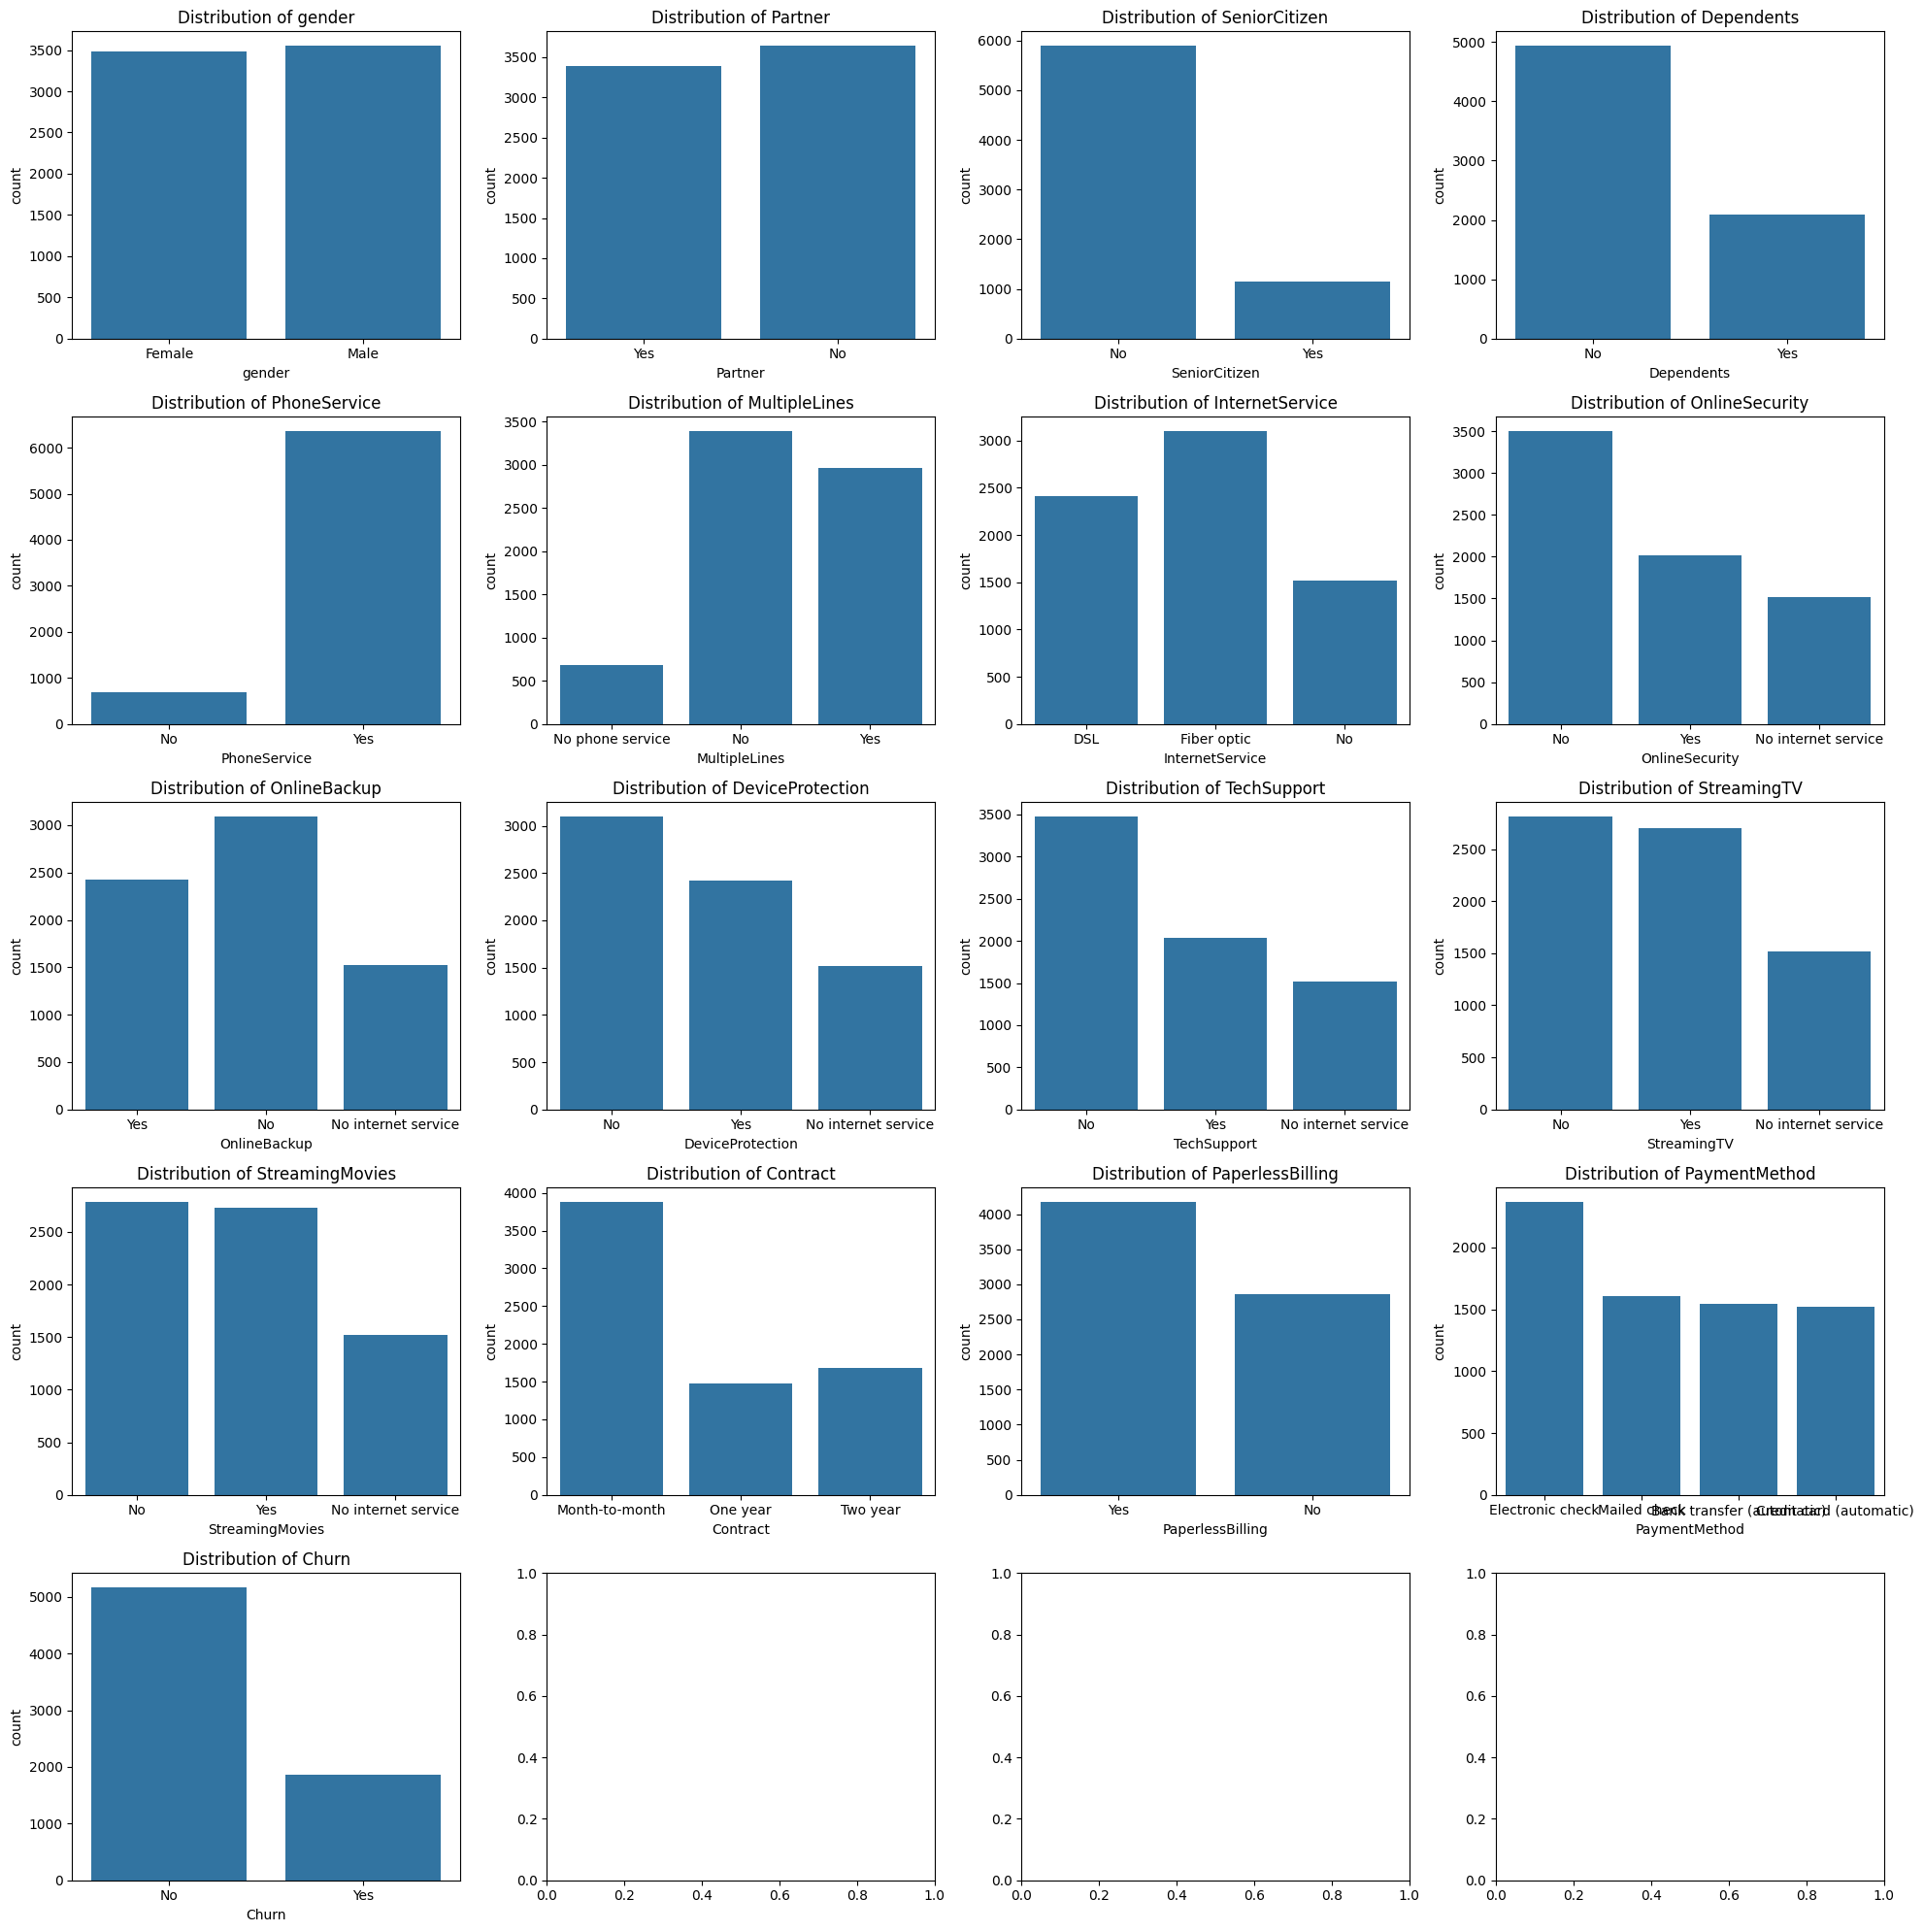

In [16]:
# 显示类别型变量的分布，每行4个
categorical_columns = ['gender', 'Partner', 'SeniorCitizen','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


fig, axes = plt.subplots(5, 4, figsize=(20, 5 * 4))
axes = axes.flatten()  # 将子图矩阵变成一维数组，方便迭代

for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [18]:
df.to_csv("customer_clean.csv", index=False)

In [19]:
df = pd.read_csv("customer_clean.csv")
df 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# Split Dataset into train and test Datsets

In [21]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (4922, 19)
Size of test set: (2110, 19)


In [23]:
y_train.value_counts()     # imbalanced data - f1 score

Churn
No     3614
Yes    1308
Name: count, dtype: int64

In [24]:
y_test.value_counts()     # imbalanced data - f1 score

Churn
No     1549
Yes     561
Name: count, dtype: int64

In [25]:
y_train.value_counts(normalize=True)     # imbalanced data - f1 score

Churn
No     0.734254
Yes    0.265746
Name: proportion, dtype: float64

In [26]:
y_test.value_counts(normalize=True)     # imbalanced data - f1 score

Churn
No     0.734123
Yes    0.265877
Name: proportion, dtype: float64

# Separate categorical and numeric columns

In [27]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numeric_features

(['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

# Categorical Transformer

In [28]:
X_train[categorical_features].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4491,Female,No,No,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
1928,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
4660,Female,No,No,Yes,Yes,No,DSL,Yes,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
5672,Female,Yes,Yes,No,Yes,No,DSL,No,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic)
3604,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [29]:
categorical_transformer = Pipeline(steps=[
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer.fit_transform(X_train[categorical_features])

X_train_encoded = categorical_transformer.fit_transform(X_train[categorical_features])

X_train = X_train.drop(columns=categorical_features)
X_train = pd.concat([X_train, X_train_encoded], axis=1)

In [30]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4491,12,78.30,909.25,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1928,20,19.70,415.90,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4660,2,61.20,125.95,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5672,34,64.20,2106.30,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3604,12,100.15,1164.30,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [31]:
X_train.shape

(4922, 46)

In [32]:
categorical_transformer = Pipeline(steps=[
                                          ("onehot", OneHotEncoder(sparse_output=False,
                                                                   handle_unknown="ignore").set_output(transform="pandas"))
                                          ])
categorical_transformer.fit_transform(X_test[categorical_features])

X_test_encoded = categorical_transformer.fit_transform(X_test[categorical_features])

X_test = X_test.drop(columns=categorical_features)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [33]:
X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4214,1,19.30,19.30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1815,6,45.65,323.45,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2370,71,109.70,7904.25,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
5453,64,70.15,4480.70,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1786,44,61.50,2722.20,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
X_test.shape

(2110, 46)

In [35]:
y_train

4491    Yes
1928     No
4660     No
5672     No
3604    Yes
       ... 
5153     No
3445     No
4128     No
4242     No
272     Yes
Name: Churn, Length: 4922, dtype: object

In [36]:
y_test

4214    No
1815    No
2370    No
5453    No
1786    No
        ..
4677    No
4760    No
6141    No
3229    No
4443    No
Name: Churn, Length: 2110, dtype: object

In [37]:
# LabelEncoder y_train， y_test 
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [38]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [39]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [40]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

# Build Model —— With Duplicated

## Decision Tree (not tuned)

In [41]:
# Create a Decision tree classifier model
dt = DecisionTreeClassifier(random_state=0)

# Train the model using the training sets
dt.fit(X_train, y_train)

# Prediction on test data
y_pred = dt.predict(X_test)

# Calculating the f1_score
f1_dt_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Decision Tree model:', f1_dt_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_dt_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_dt_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Decision Tree model: 71.79
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1549
           1       0.47      0.46      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110

------------------------------------------------------------


,No,Yes
No,1259,290
Yes,303,258


## Decision Tree (tuned)

In [42]:
# list parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [43]:
# define parameters
parameters = {'max_features': ['log2', 'sqrt', None, 0.8],
              'criterion': ['entropy', 'gini'],
              'max_depth': [3, 5, 7],
              
               # advanced settings to control the tree depth (complexity)
              'min_samples_split': [10, 20, 30],
              'min_samples_leaf': [5, 10, 15]
             }

In [44]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(dt, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_dt_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Decision Tree model:', f1_dt_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_dt_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_dt_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Decision Tree model: 76.55
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.59      0.48      0.53       561

    accuracy                           0.77      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.77      0.77      2110

------------------------------------------------------------


,No,Yes
No,1359,190
Yes,289,272


In [45]:
grid_obj.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 15,
 'min_samples_split': 10}

## Random Forest (not tuned)

In [46]:
# Create a Random Forest classifier model
rf = RandomForestClassifier(random_state=0)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Calculating the f1_score
f1_rf_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Random Forest model:', f1_rf_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_rf_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_rf_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Random Forest model: 76.63
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

------------------------------------------------------------


,No,Yes
No,1377,172
Yes,300,261


## Random Forest (tuned)

In [47]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [48]:
# define parameters
parameters = {'n_estimators': [100, 200, 500], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10, None]
             }

In [49]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(rf, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_rf_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Random Forest model:', f1_rf_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_rf_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_rf_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Random Forest model: 78.35
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

------------------------------------------------------------


,No,Yes
No,1399,150
Yes,286,275


In [50]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

## XG-Boost (not tuned)

In [51]:
# Create a XG-Boost classifier
xgb = XGBClassifier()

# Train the model using the training sets
xgb.fit(X_train, y_train)

# Prediction on test data
y_pred = xgb.predict(X_test)

# Calculating the f1_score
f1_xgb_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # 可以根据需求选择 'macro', 'micro', 或 'weighted'
print('F1 Score of XGBoost model:', f1_xgb_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_xgb_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_xgb_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of XGBoost model: 77.01
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.77      0.77      2110

------------------------------------------------------------


,No,Yes
No,1345,204
Yes,271,290


## XG-Boost (tuned)

In [52]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [53]:
# Define the parameter grid for XGBClassifier
parameters = {
    'n_estimators': [100, 200, 500],         
    'max_depth': [3, 6, 9],                
    'learning_rate': [0.01, 0.1, 0.2],      
    'subsample': [0.8, 1.0],               
    'colsample_bytree': [0.8, 1.0],          
    'gamma': [0, 0.1],                     
}

In [54]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(xgb, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# random_search_obj = RandomizedSearchCV(xgb, parameters, cv=5)
# random_search_obj = random_search_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
# clf = random_search_obj.best_estimator_

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_xgb_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # 可以根据需求选择 'macro', 'micro', 或 'weighted'
print('F1 Score of XGBoost model:', f1_xgb_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_xgb_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_xgb_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of XGBoost model: 78.84
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

------------------------------------------------------------


,No,Yes
No,1401,148
Yes,279,282


In [55]:
grid_obj.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1.0}

## Numeric Features Data Scaling

In [56]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = pd.DataFrame(sc.fit_transform(X_train[numeric_features]), 
                          columns=numeric_features, 
                          index=X_train.index)

X_train = X_train.drop(columns=numeric_features)
X_train = pd.concat([X_train, X_train_sc], axis=1)
X_train

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4491,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.833469,0.444749,-0.607066
1928,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.508058,-1.492135,-0.823672
4660,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.240233,-0.120451,-0.950975
5672,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.061411,-0.021293,-0.081500
3604,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.833469,1.166949,-0.495086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.386029,-0.353472,-0.430041
3445,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.322379,0.201812,0.993692
4128,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.142764,0.927318,0.477390
4242,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.914822,0.034897,-0.716478


In [58]:
X_test_sc = pd.DataFrame(sc.transform(X_test[numeric_features]), 
                         columns=numeric_features, 
                         index=X_test.index)

X_test = X_test.drop(columns=numeric_features)
X_test = pd.concat([X_test, X_test_sc], axis=1)
X_test

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4214,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.280909,-1.505356,-0.997800
1815,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.077527,-0.634419,-0.864262
2370,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.566437,1.482602,2.464095
5453,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.281702,0.175370,0.960982
1786,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.468175,-0.110535,0.188911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.549528,1.456160,1.125012
4760,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.566437,-1.488830,-0.396673
6141,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.019942,0.866170,0.254462
3229,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.345352,-1.492135,-0.807581


## Logistic Regression (not tuned)

In [59]:
# Create a Logistic regression classifier
logreg = LogisticRegression(random_state=0, max_iter=10000) # increase max_iter e.g. max_iter=10000 to get rid of convergence warning

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Calculating the f1_score
f1_logreg_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Logistic Regression model:', f1_logreg_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_logreg_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_logreg_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Logistic Regression model: 80.1
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

------------------------------------------------------------


,No,Yes
No,1382,167
Yes,243,318


## Logistic Regression (tuned)

In [60]:
# list parameters
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
# define parameters
parameters = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver' : ['lbfgs']
    },

    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver' : ['liblinear']
    }
]

In [62]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(logreg, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_logreg_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Logistic Regression model:', f1_logreg_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_logreg_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_logreg_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Logistic Regression model: 78.9
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

------------------------------------------------------------


,No,Yes
No,1404,145
Yes,280,281


In [63]:
grid_obj.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

## Support Vector Machines (not tuned)

In [64]:
# Create a Support Vector Classifier
svc = svm.SVC(random_state=8)

# Train the model using the training sets
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Calculating the f1_score
f1_svm_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Support Vector Machines:', f1_svm_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_svm_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_svm_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Support Vector Machines: 78.54
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110

------------------------------------------------------------


,No,Yes
No,1408,141
Yes,289,272


## Support Vector Machines (tuned)

In [65]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [66]:
# define parameters
parameters = [

  {
      'C': [1, 10, 100, 1000],
      'kernel': ['linear']
   },

  {
      'C': [1, 10, 100, 1000],
      'gamma': [0.001, 0.0001],
      'kernel': ['rbf']
   },

]

In [67]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(svc, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_svm_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Support Vector Machines model:', f1_svm_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_svm_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_svm_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Support Vector Machines model: 78.41
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

------------------------------------------------------------


,No,Yes
No,1405,144
Yes,289,272


In [68]:
grid_obj.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

## K - Nearest Neighbors (not tuned)

In [69]:
# Create a K - Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Calculating the f1_score
f1_knn_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Decision Tree model:', f1_knn_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_knn_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_knn_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Decision Tree model: 76.56
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1549
           1       0.56      0.57      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.76      0.77      2110

------------------------------------------------------------


,No,Yes
No,1292,257
Yes,240,321


## K - Nearest Neighbors (tuned)

In [70]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [71]:
# define parameters
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

In [72]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(knn, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_knn_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of K - Nearest Neighbors model:', f1_knn_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_knn_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_knn_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of K - Nearest Neighbors model: 76.74
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

------------------------------------------------------------


,No,Yes
No,1371,178
Yes,294,267


In [73]:
grid_obj.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}

## Performance —— with duplication

In [74]:
models_with = pd.DataFrame({
    'Model_without': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XG-Boost', 'Support Vector Machines'],
    'f1_weighted_basic': [round(f1_logreg_bs/100,2), round(f1_dt_bs/100,2), round(f1_rf_bs/100,2), round(f1_knn_bs/100,2), round(f1_xgb_bs/100,2), round(f1_svm_bs/100,2)],
    'f1_weighted_tuned': [round(f1_logreg_t/100,2), round(f1_dt_t/100,2), round(f1_rf_t/100,2), round(f1_knn_t/100,2), round(f1_xgb_t/100,2), round(f1_svm_t/100,2)],
    'f1_no_basic': [f1_logreg_bs_class_0, f1_dt_bs_class_0, f1_rf_bs_class_0, f1_knn_bs_class_0, f1_xgb_bs_class_0, f1_svm_bs_class_0],
    'f1_yes_basic': [f1_logreg_bs_class_1, f1_dt_bs_class_1, f1_rf_bs_class_1, f1_knn_bs_class_1, f1_xgb_bs_class_1, f1_svm_bs_class_1],
    'f1_no_tuned': [f1_logreg_t_class_0, f1_dt_t_class_0, f1_rf_t_class_0, f1_knn_t_class_0, f1_xgb_t_class_0, f1_svm_t_class_0],
    'f1_yes_tuned': [f1_logreg_t_class_1, f1_dt_t_class_1, f1_rf_t_class_1, f1_knn_t_class_1, f1_xgb_t_class_1, f1_svm_t_class_1]
})
models_with

,Model_without,f1_weighted_basic,f1_weighted_tuned,f1_no_basic,f1_yes_basic,f1_no_tuned,f1_yes_tuned
0,Logistic Regression,0.80,0.79,0.87,0.61,0.87,0.57
1,Decision Tree,0.72,0.77,0.81,0.47,0.85,0.53
2,Random Forest,0.77,0.78,0.85,0.53,0.87,0.56
3,K-Nearest Neighbors,0.77,0.77,0.84,0.56,0.85,0.53
4,XG-Boost,0.77,0.79,0.85,0.55,0.87,0.57
5,Support Vector Machines,0.79,0.78,0.87,0.56,0.87,0.56


In [76]:
# best score in the table
max_value = models_with.select_dtypes(include=[float, int]).max().max()

# return the position of the best score
max_value_location = models_with.set_index('Model_without').stack().idxmax() 

# return the model and parameter
best_model = max_value_location[0]  
best_method = max_value_location[1] 

print("The Model with the highest f1 is:", best_model)
print("The Method is:", best_method)
print("The Maximum Value is:", max_value)

The Model with the highest f1 is: Logistic Regression
The Method is: f1_no_basic
The Maximum Value is: 0.87


# Build Model —— Without Duplicated

In [87]:
# save the X_train, X_test
X_train_w = X_train.copy()
X_test_w = X_test.copy()

In [88]:
X_train_w.equals(X_train)

True

In [89]:
X_test_w.equals(X_test)

True

In [90]:
X_test_w = X_test

In [91]:
X_train.shape

(4922, 46)

In [92]:
X_test.shape

(2110, 46)

In [93]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [94]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
# X_train
duplicated_columns = X_train.T.duplicated(keep = False)
duplicated_columns

gender_Female                              False
gender_Male                                False
SeniorCitizen_No                           False
SeniorCitizen_Yes                          False
Partner_No                                 False
Partner_Yes                                False
Dependents_No                              False
Dependents_Yes                             False
PhoneService_No                             True
PhoneService_Yes                           False
MultipleLines_No                           False
MultipleLines_No phone service              True
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                          True
OnlineSecurity_No                          False
OnlineSecurity_No internet service          True
OnlineSecurity_Yes                         False
OnlineBackup_No                            False
OnlineBackup_No inte

In [96]:
X_train = X_train.T.drop_duplicates(keep='first').T
X_train.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4491,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.833469,0.444749,-0.607066
1928,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.508058,-1.492135,-0.823672
4660,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.240233,-0.120451,-0.950975
5672,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.061411,-0.021293,-0.081500
3604,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.833469,1.166949,-0.495086


In [97]:
X_train.shape

(4922, 39)

In [98]:
# X_test
duplicated_columns = X_test.T.duplicated(keep = False)
duplicated_columns

gender_Female                              False
gender_Male                                False
SeniorCitizen_No                           False
SeniorCitizen_Yes                          False
Partner_No                                 False
Partner_Yes                                False
Dependents_No                              False
Dependents_Yes                             False
PhoneService_No                             True
PhoneService_Yes                           False
MultipleLines_No                           False
MultipleLines_No phone service              True
MultipleLines_Yes                          False
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                          True
OnlineSecurity_No                          False
OnlineSecurity_No internet service          True
OnlineSecurity_Yes                         False
OnlineBackup_No                            False
OnlineBackup_No inte

In [99]:
X_test = X_test.T.drop_duplicates(keep='first').T
X_test.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4214,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.280909,-1.505356,-0.997800
1815,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.077527,-0.634419,-0.864262
2370,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.566437,1.482602,2.464095
5453,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.281702,0.175370,0.960982
1786,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.468175,-0.110535,0.188911


In [100]:
X_test.shape

(2110, 39)

In [101]:
X_train_w.equals(X_train)

False

In [102]:
X_test_w.equals(X_test)

False

## Decision Tree (not tuned)

In [103]:
# Create a Decision tree classifier model
dt = DecisionTreeClassifier(random_state=0)

# Train the model using the training sets
dt.fit(X_train, y_train)

# Prediction on test data
y_pred = dt.predict(X_test)

# Calculating the f1_score
f1_dt_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Decision Tree model:', f1_dt_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_dt_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_dt_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Decision Tree model: 71.86
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1549
           1       0.47      0.45      0.46       561

    accuracy                           0.72      2110
   macro avg       0.64      0.63      0.64      2110
weighted avg       0.72      0.72      0.72      2110

------------------------------------------------------------


,No,Yes
No,1268,281
Yes,308,253


## Decision Tree (tuned)

In [104]:
# list parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [105]:
# define parameters
parameters = {'max_features': ['log2', 'sqrt', None, 0.8],
              'criterion': ['entropy', 'gini'],
              'max_depth': [3, 5, 7],
              
               # advanced settings to control the tree depth (complexity)
              'min_samples_split': [10, 20, 30],
              'min_samples_leaf': [5, 10, 15]
             }

In [106]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(dt, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_dt_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Decision Tree model:', f1_dt_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_dt_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_dt_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Decision Tree model: 77.09
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.58      0.54      0.56       561

    accuracy                           0.77      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110

------------------------------------------------------------


,No,Yes
No,1329,220
Yes,258,303


In [107]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 30}

## Random Forest (not tuned)

In [108]:
# Create a Random Forest classifier model
rf = RandomForestClassifier(random_state=0)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Prediction on test data
y_pred = rf.predict(X_test)

# Calculating the f1_score
f1_rf_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Random Forest model:', f1_rf_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_rf_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_rf_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Random Forest model: 76.42
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.46      0.52       561

    accuracy                           0.77      2110
   macro avg       0.71      0.67      0.69      2110
weighted avg       0.76      0.77      0.76      2110

------------------------------------------------------------


,No,Yes
No,1379,170
Yes,305,256


## Random Forest (tuned)

In [109]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [110]:
# define parameters
parameters = {'n_estimators': [100, 200, 500], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10, None]
             }

In [111]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(rf, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_rf_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Random Forest model:', f1_rf_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_rf_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_rf_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Random Forest model: 78.03
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110

------------------------------------------------------------


,No,Yes
No,1397,152
Yes,290,271


In [112]:
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 200}

## XG-Boost (not tuned)

In [113]:
# Create a XG-Boost classifier
xgb = XGBClassifier()

# Train the model using the training sets
xgb.fit(X_train, y_train)

# Prediction on test data
y_pred = xgb.predict(X_test)

# Calculating the f1_score
f1_xgb_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # 可以根据需求选择 'macro', 'micro', 或 'weighted'
print('F1 Score of XGBoost model:', f1_xgb_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_xgb_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_xgb_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of XGBoost model: 77.01
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.77      0.77      2110

------------------------------------------------------------


,No,Yes
No,1345,204
Yes,271,290


## XG-Boost (tuned)

In [114]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [115]:
# Define the parameter grid for XGBClassifier
parameters = {
    'n_estimators': [100, 200, 500],         
    'max_depth': [3, 6, 9],                
    'learning_rate': [0.01, 0.1, 0.2],      
    'subsample': [0.8, 1.0],               
    'colsample_bytree': [0.8, 1.0],          
    'gamma': [0, 0.1],                     
}

In [116]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(xgb, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# random_search_obj = RandomizedSearchCV(xgb, parameters, cv=5)
# random_search_obj = random_search_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
# clf = random_search_obj.best_estimator_

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_xgb_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # 可以根据需求选择 'macro', 'micro', 或 'weighted'
print('F1 Score of XGBoost model:', f1_xgb_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_xgb_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_xgb_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of XGBoost model: 78.74
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

------------------------------------------------------------


,No,Yes
No,1403,146
Yes,282,279


In [117]:
grid_obj.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.8}

## Numeric Features Data Scaling

In [118]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = pd.DataFrame(sc.fit_transform(X_train[numeric_features]), 
                          columns=numeric_features, 
                          index=X_train.index)

X_train = X_train.drop(columns=numeric_features)
X_train = pd.concat([X_train, X_train_sc], axis=1)
X_train

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4491,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.833469,0.444749,-0.607066
1928,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.508058,-1.492135,-0.823672
4660,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.240233,-0.120451,-0.950975
5672,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.061411,-0.021293,-0.081500
3604,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.833469,1.166949,-0.495086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.386029,-0.353472,-0.430041
3445,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.322379,0.201812,0.993692
4128,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.142764,0.927318,0.477390
4242,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.914822,0.034897,-0.716478


In [120]:
X_test_sc = pd.DataFrame(sc.transform(X_test[numeric_features]), 
                         columns=numeric_features, 
                         index=X_test.index)

X_test = X_test.drop(columns=numeric_features)
X_test = pd.concat([X_test, X_test_sc], axis=1)
X_test

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4214,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.280909,-1.505356,-0.997800
1815,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.077527,-0.634419,-0.864262
2370,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.566437,1.482602,2.464095
5453,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.281702,0.175370,0.960982
1786,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.468175,-0.110535,0.188911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.549528,1.456160,1.125012
4760,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.566437,-1.488830,-0.396673
6141,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.019942,0.866170,0.254462
3229,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.345352,-1.492135,-0.807581


## Logistic Regression (not tuned)

In [121]:
# Create a Logistic regression classifier
logreg = LogisticRegression(random_state=0, max_iter=10000) # increase max_iter e.g. max_iter=10000 to get rid of convergence warning

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Calculating the f1_score
f1_logreg_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Logistic Regression model:', f1_logreg_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_logreg_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_logreg_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Logistic Regression model: 80.0
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110

------------------------------------------------------------


,No,Yes
No,1381,168
Yes,244,317


## Logistic Regression (tuned)

In [122]:
# list parameters
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [123]:
# define parameters
parameters = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver' : ['lbfgs']
    },

    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver' : ['liblinear']
    }
]

In [124]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(logreg, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
_
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_logreg_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Logistic Regression model:', f1_logreg_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_logreg_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_logreg_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Logistic Regression model: 78.82
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

------------------------------------------------------------


,No,Yes
No,1402,147
Yes,280,281


In [125]:
grid_obj.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

## Support Vector Machines (not tuned)

In [126]:
# Create a Support Vector Classifier
svc = svm.SVC(random_state=8)

# Train the model using the training sets
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

# Calculating the f1_score
f1_svm_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Support Vector Machines:', f1_svm_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_svm_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_svm_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Support Vector Machines: 78.5
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.78      2110

------------------------------------------------------------


,No,Yes
No,1407,142
Yes,289,272


## Support Vector Machines (tuned)

In [127]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [130]:
# define parameters    
parameters = [

  {
      'C': [1, 10, 100, 1000],
      'kernel': ['linear']
   },

  {
      'C': [1, 10, 100, 1000],
      'gamma': [0.001, 0.0001],
      'kernel': ['rbf']
   },

]

In [131]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(svc, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_svm_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Support Vector Machines model:', f1_svm_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_svm_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_svm_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Support Vector Machines model: 78.3
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110

------------------------------------------------------------


,No,Yes
No,1405,144
Yes,291,270


In [132]:
grid_obj.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

## K - Nearest Neighbors (not tuned)

In [133]:
# Create a K - Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train, y_train)

# Prediction on test data
y_pred = knn.predict(X_test)

# Calculating the f1_score
f1_knn_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Decision Tree model:', f1_knn_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_knn_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_knn_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Decision Tree model: 76.6
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1549
           1       0.56      0.57      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.76      0.77      2110

------------------------------------------------------------


,No,Yes
No,1293,256
Yes,240,321


## K - Nearest Neighbors (tuned)

In [134]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [135]:
# define parameters
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

In [137]:
# Grid Search 
# Run the grid search
grid_obj = GridSearchCV(knn, parameters, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets
clf.fit(X_train, y_train)

# Prediction on test data
y_pred = clf.predict(X_test)

# Calculating the f1_score
f1_knn_t = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of K - Nearest Neighbors model:', f1_knn_t)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_knn_t_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_knn_t_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of K - Nearest Neighbors model: 76.8
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

------------------------------------------------------------


,No,Yes
No,1371,178
Yes,293,268


In [138]:
grid_obj.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'uniform'}

## Performance —— without duplication

In [139]:
models_without = pd.DataFrame({
    'Model_without': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XG-Boost', 'Support Vector Machines'],
    'f1_weighted_basic': [round(f1_logreg_bs/100,2), round(f1_dt_bs/100,2), round(f1_rf_bs/100,2), round(f1_knn_bs/100,2), round(f1_xgb_bs/100,2), round(f1_svm_bs/100,2)],
    'f1_weighted_tuned': [round(f1_logreg_t/100,2), round(f1_dt_t/100,2), round(f1_rf_t/100,2), round(f1_knn_t/100,2), round(f1_xgb_t/100,2), round(f1_svm_t/100,2)],
    'f1_no_basic': [f1_logreg_bs_class_0, f1_dt_bs_class_0, f1_rf_bs_class_0, f1_knn_bs_class_0, f1_xgb_bs_class_0, f1_svm_bs_class_0],
    'f1_yes_basic': [f1_logreg_bs_class_1, f1_dt_bs_class_1, f1_rf_bs_class_1, f1_knn_bs_class_1, f1_xgb_bs_class_1, f1_svm_bs_class_1],
    'f1_no_tuned': [f1_logreg_t_class_0, f1_dt_t_class_0, f1_rf_t_class_0, f1_knn_t_class_0, f1_xgb_t_class_0, f1_svm_t_class_0],
    'f1_yes_tuned': [f1_logreg_t_class_1, f1_dt_t_class_1, f1_rf_t_class_1, f1_knn_t_class_1, f1_xgb_t_class_1, f1_svm_t_class_1]
})
models_without

,Model_without,f1_weighted_basic,f1_weighted_tuned,f1_no_basic,f1_yes_basic,f1_no_tuned,f1_yes_tuned
0,Logistic Regression,0.80,0.79,0.87,0.61,0.87,0.57
1,Decision Tree,0.72,0.77,0.81,0.46,0.85,0.56
2,Random Forest,0.76,0.78,0.85,0.52,0.86,0.55
3,K-Nearest Neighbors,0.77,0.77,0.84,0.56,0.85,0.53
4,XG-Boost,0.77,0.79,0.85,0.55,0.87,0.57
5,Support Vector Machines,0.78,0.78,0.87,0.56,0.87,0.55


In [140]:
# best score in the table
max_value = models_without.select_dtypes(include=[float, int]).max().max()

# return the position of the best score
max_value_location = models_without.set_index('Model_without').stack().idxmax() 

# return the model and parameter
best_model = max_value_location[0]  
best_method = max_value_location[1] 

print("The Model with the highest f1 is:", best_model)
print("The Method is:", best_method)
print("The Maximum Value is:", max_value)

The Model with the highest f1 is: Logistic Regression
The Method is: f1_no_basic
The Maximum Value is: 0.87


# Best Model

In [141]:
# compare two table
models_with

,Model_without,f1_weighted_basic,f1_weighted_tuned,f1_no_basic,f1_yes_basic,f1_no_tuned,f1_yes_tuned
0,Logistic Regression,0.80,0.79,0.87,0.61,0.87,0.57
1,Decision Tree,0.72,0.77,0.81,0.47,0.85,0.53
2,Random Forest,0.77,0.78,0.85,0.53,0.87,0.56
3,K-Nearest Neighbors,0.77,0.77,0.84,0.56,0.85,0.53
4,XG-Boost,0.77,0.79,0.85,0.55,0.87,0.57
5,Support Vector Machines,0.79,0.78,0.87,0.56,0.87,0.56


In [142]:
models_without

,Model_without,f1_weighted_basic,f1_weighted_tuned,f1_no_basic,f1_yes_basic,f1_no_tuned,f1_yes_tuned
0,Logistic Regression,0.80,0.79,0.87,0.61,0.87,0.57
1,Decision Tree,0.72,0.77,0.81,0.46,0.85,0.56
2,Random Forest,0.76,0.78,0.85,0.52,0.86,0.55
3,K-Nearest Neighbors,0.77,0.77,0.84,0.56,0.85,0.53
4,XG-Boost,0.77,0.79,0.85,0.55,0.87,0.57
5,Support Vector Machines,0.78,0.78,0.87,0.56,0.87,0.55


**Best Model**： Logistic Regression basic model

In [287]:
# Best Model
# take Data with Duplication
X_train = X_train_w
X_test = X_test_w

# Create a Logistic regression classifier
logreg = LogisticRegression(random_state=0, max_iter=10000) # increase max_iter e.g. max_iter=10000 to get rid of convergence warning

# Train the model using the training sets
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Calculating the f1_score
f1_logreg_bs = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)  # You can use 'macro', 'micro', or 'weighted'
print('F1 Score of Logistic Regression model:', f1_logreg_bs)
print('-' * 60)
print(classification_report(y_test, y_pred))
f1_logreg_bs_class_0 = round(classification_report(y_test, y_pred, output_dict=True)['0']['f1-score'],2)
f1_logreg_bs_class_1 = round(classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],2)
print('-' * 60)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['No', 'Yes'], index=['No', 'Yes'])

F1 Score of Logistic Regression model: 80.1
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

------------------------------------------------------------


,No,Yes
No,1382,167
Yes,243,318


In [393]:
# result dataeframe
X_test_result = X_test.copy()  
X_test_result ['y_test'] = y_test 
X_test_result ['y_pred'] = y_pred 

yes_result = X_test_result.iloc[:,-2:].loc[(y_test==1) &(y_pred==1)]

# SHAP Explainer

## Global

In [394]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [395]:
# Create SHAP Explainer & Compute SHAP values
explainer = shap.LinearExplainer(logreg, X_train)

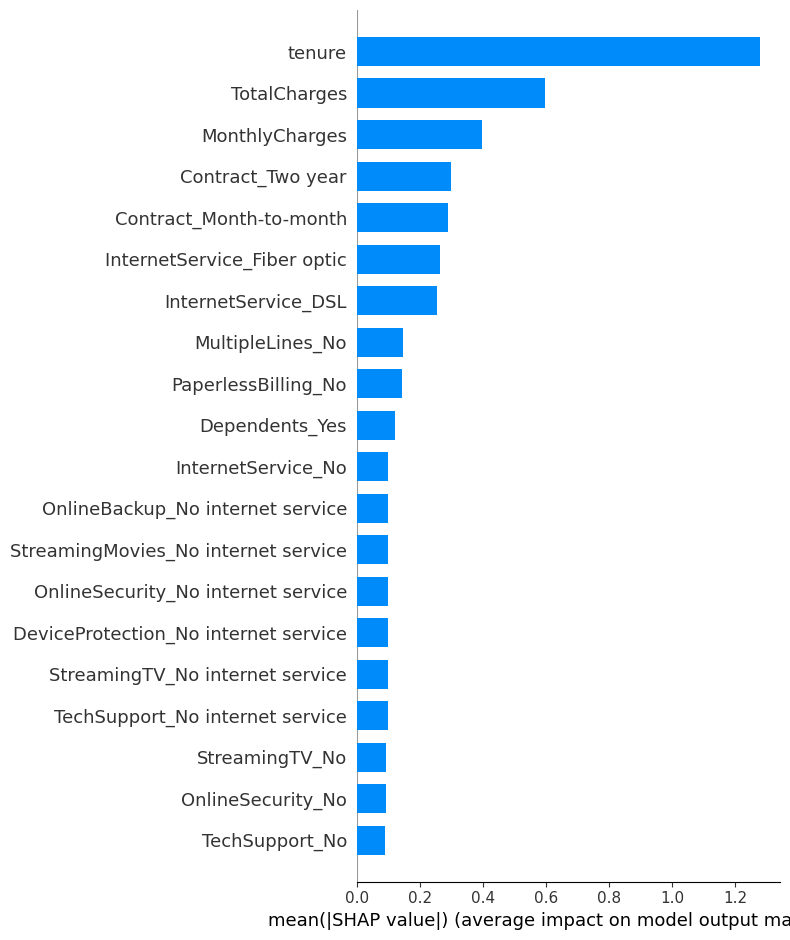

In [396]:
# Global
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(6, 3))
shap.summary_plot(shap_values, X_test, plot_type='bar')

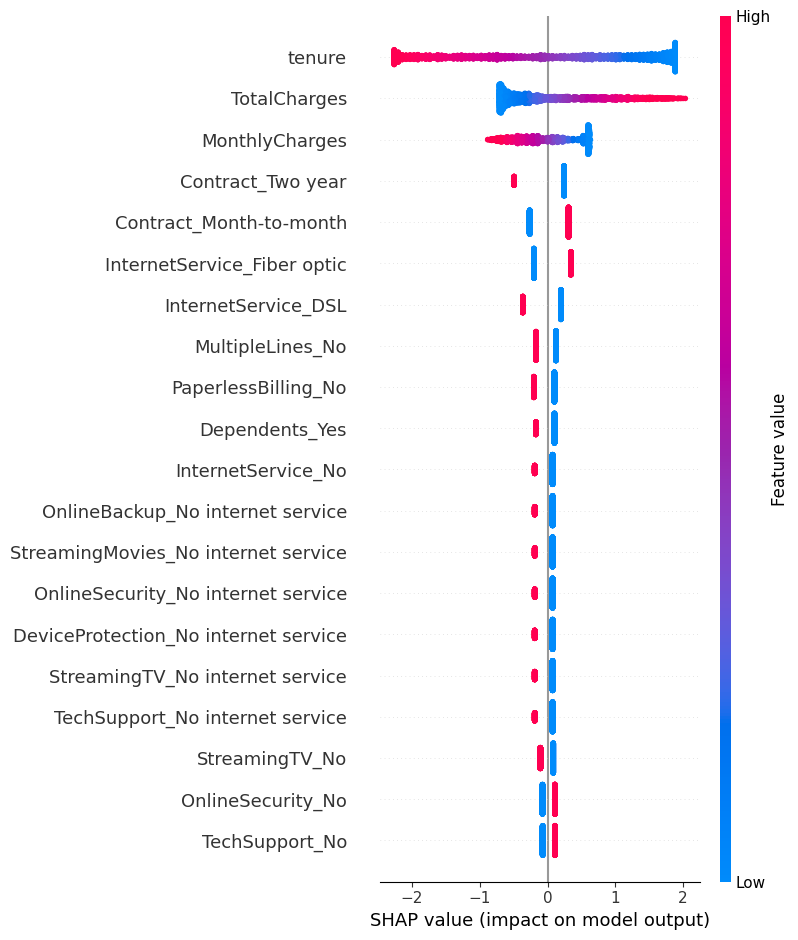

In [397]:
# Global
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(6, 3))
shap.summary_plot(shap_values, X_test)

## Lobal
Explaining for a specific house (1 row of test data)

In [398]:
df = pd.read_csv("customer_clean.csv")

In [399]:
yes_result

,y_test,y_pred
649,1,1
1597,1,1
641,1,1
4632,1,1
6495,1,1
...,...,...
753,1,1
5774,1,1
2790,1,1
4656,1,1


In [400]:
df_top_20 = df.loc[yes_result.index].sort_values(by=["tenure","TotalCharges"],ascending = False).head(20)
df_top_20

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4494,Male,No,No,No,55,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.80,5283.95,Yes
3405,Male,Yes,Yes,No,53,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.90,5549.40,Yes
6000,Male,Yes,Yes,No,53,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.85,5485.50,Yes
1658,Male,No,Yes,No,51,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,4812.75,Yes
3519,Female,Yes,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,95.05,4888.70,Yes
1921,Male,No,Yes,Yes,49,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,4872.45,Yes
3903,Female,No,No,No,47,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,5127.95,Yes
6607,Male,No,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.40,4528.00,Yes
6535,Female,Yes,No,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.75,4323.45,Yes
1765,Female,Yes,No,No,41,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,113.20,4689.50,Yes


In [401]:
df_top_20.index

Index([4494, 3405, 6000, 1658, 3519, 1921, 3903, 6607, 6535, 1765, 3328, 1121,
       6597, 4300, 6849,  113, 4839, 4904, 2516, 5169],
      dtype='int64')

In [402]:
# yes-yes predict and churn user- top 20
X_test.loc[df_top_20.index]

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
4494,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.915615,1.056223,1.313650
3405,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.834262,1.224791,1.430196
6000,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.834262,1.289244,1.402141
1658,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.752910,0.985160,1.106769
3519,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.712233,0.998381,1.140115
1921,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.671557,1.155381,1.132981
3903,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.590204,1.373528,1.245158
6607,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.427499,1.208265,0.981750
6535,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.386822,1.318991,0.891942
1765,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.346146,1.598286,1.052656


In [408]:
# yes-yes predict and churn user- index 1875
sv = explainer.shap_values(X_test.loc[[4494]])
shap.initjs()
shap.force_plot(explainer.expected_value, sv[0].T, X_test.loc[[4494]])

In [409]:
df_top_20.loc[4494]

gender                          Male
SeniorCitizen                     No
Partner                           No
Dependents                        No
tenure                            55
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                      Yes
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                  96.8
TotalCharges                 5283.95
Churn                            Yes
Name: 4494, dtype: object